## Daegu Apartment

Apartemen merupakan tempat sebagai pengganti rumah konvensional yang semakin lama harga tanahnya bisa semakin mahal. Hal ini dikarenakan mengecilnya lahan yang ada di perkotaan yang semakin kecil. Banyak masyarakat yang sudah menggunakan apartemen dibandingkan dengan membeli rumah. Apartemen pun dapat digunakan sebagai investasi dikarenakan harganya yang selalu meningkat. Harga dari apartemen ini dapat meningkat juga seiring berjalannya waktu dan juga tergantung dari lokasi tempat apartemen tersebut. Hal seperti seberapa dekat dengan fasilitas publik, universitas/sekolah, tahun dibangun, ukuran, jumlah fasilitas di apartemen, dll, juga dapat mempengaruhi harga dari apartemen.

### **Problem Statement**

Kebanyakan harga dari properti seperti rumah biasanya akan terus meningkat seiring waktu. Tidak hanya rumah, harga dari unit apartemen pun akan terus meningkat seiring waktu. Hal tersebut dapat dikarenakan berkurangnya tanah yang ada dan juga bisa jadi karena adanya peningkatan dari segi akses dan fasilitas yang ada di sekitar dan dalam apartemen tersebut.

Dikarenakan adanya peningkatan dari harga apartemen tersebut, banyak perusahaan properti yang ingin memprediksi kenaikan dari harga apartemen tersebut. Tidak hanya itu, banyak orang pun ingin mengetahui peningkatan dari harga tersebut untuk investasi. Hal tesebut membuat banyak pihak bertanya-tanya mengenai harga yang tepat untuk sebuah unit apartemen dijual. Oleh karena itu, penting untuk mengetahui prediksi harga apartemen di masa yang akan datang untuk memudahkan penjualan apartemen ataupun pembelian unit partemen.

### **Tujuan**

Dilakukannya pembuatan model machine learning ini adalah untuk memprediksi harga dari unit apartemen berdasarkan variabel-variabel yang ada dalam dataset. Hal tersebut bertujuan agar memudahkan pihak properti ataupun indivdu yang ingin berinvestasi dalam properti unit apartemen memprediksi harga dari unit apartemen.

### **Data Understanding**

Data yang digunakan berisikan tentang apartemen yang berada di Daegu, Korea Selatan

Features:
- HallwayType: Tipe apartemen
- TimeToSubway: Waktu yang dibutuhkan untuk ke subway terdekat
- SubwayStation: Nama subway station yang paling dekat
- N_FacilitiesNearBy(ETC): Jumlah fasilitas terdekat
- N_FacilitiesNearBy(PublicOffice): Jumlah public office terdekat
- N_SchoolNearBy(University): Jumlah kampus terdekat
- N_Parkinglot(Basement): Jumlah tempat parkir terdekat
- YearBuilt: Tahun apartemen dibuat
- N_FacilitiesInApt: Jumlah fasilitas yang ada di apartemen
- Size(sqft): Ukuran apartemen (dalam ukuran square feet)
- SalePrice: Harga apartemen (dalam Won)

In [147]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [148]:
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\bootcamp\Modul 3\Capstone 3\data_daegu_apartment.csv")

df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


## Data Exploration

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


Dari 11 variabel yang ada di dalam dataset, tiga variabelnya merupakan variabel kategorikal, yaitu hallwaytype, timetosubway, dan juga subwastation.

In [150]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8376\313768415.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


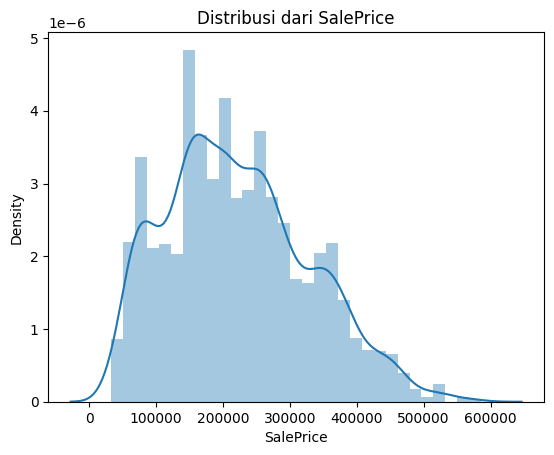

In [151]:
sns.distplot(df['SalePrice'])
plt.title('Distribusi dari SalePrice')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8376\3741788573.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


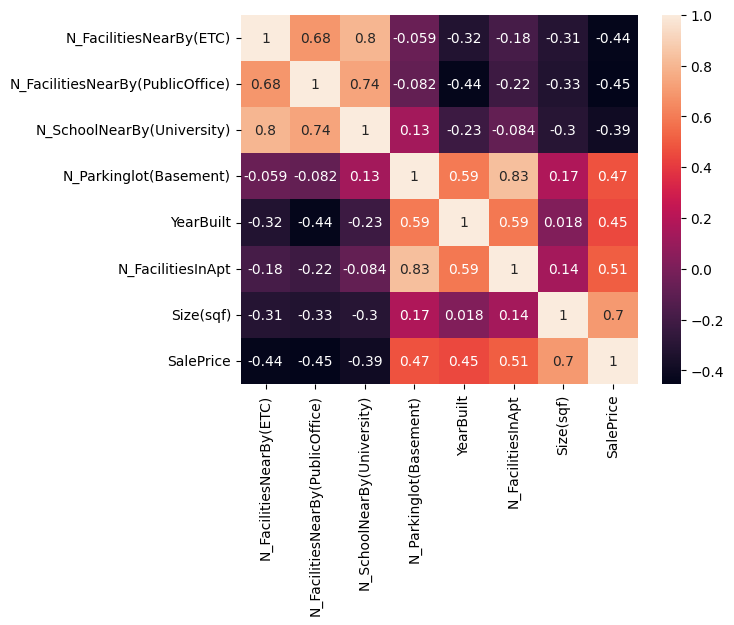

In [152]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Data Cleaning and Feature Engineering

In [153]:
df.columns = df.columns.str.lower()

In [154]:
df.isna().sum()

hallwaytype                         0
timetosubway                        0
subwaystation                       0
n_facilitiesnearby(etc)             0
n_facilitiesnearby(publicoffice)    0
n_schoolnearby(university)          0
n_parkinglot(basement)              0
yearbuilt                           0
n_facilitiesinapt                   0
size(sqf)                           0
saleprice                           0
dtype: int64

Dapat dilihat bahwa ternyata tidak ada missing values pada dataset ini

In [155]:
df.duplicated().sum()

1422

In [156]:
df[df.duplicated()].sort_values(by='saleprice').head()

,hallwaytype,timetosubway,subwaystation,n_facilitiesnearby(etc),n_facilitiesnearby(publicoffice),n_schoolnearby(university),n_parkinglot(basement),yearbuilt,n_facilitiesinapt,size(sqf),saleprice
804,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,34513
1210,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,35398
2262,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,135,35398
3961,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,35840
3628,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,36283


Dapat dilihat ternyata ada sekitar 1422 data yang terduplikasi di dalam dataset ini. Tetapi jika diteliti lebih lanjut, banyak data yang sebenarnya hanya sedikit mirip, bukan sama. Hal ini membuat data yang terduplikasi berarti tidak sebanyak 1422.

Dikarenakan jika menggunakan df.duplicated() banyak data yang dianggap sebagai duplikat, maka dibuatlah algoritma yang dapat melihat adanya duplikat dalam dataset ini.

In [157]:
# duplicated_rows = []
# num_rows = len(df)
# for i in range(num_rows):
#     for j in range(i + 1, num_rows):
#         if df.iloc[i].equals(df.iloc[j]):
#             duplicated_rows.append(i)
#             duplicated_rows.append(j)

In [158]:
# duplicated_rows = list(set(duplicated_rows))

# total_duplicates = len(duplicated_rows)
# print("Jumlah total data duplikat:", total_duplicates)

In [159]:
duplicated_groups = df.groupby(list(df.columns)).filter(lambda x: len(x) > 1)

# Menampilkan baris-baris yang dianggap duplikat
duplicated_groups.sort_values(by='saleprice').head(20)

,hallwaytype,timetosubway,subwaystation,n_facilitiesnearby(etc),n_facilitiesnearby(publicoffice),n_schoolnearby(university),n_parkinglot(basement),yearbuilt,n_facilitiesinapt,size(sqf),saleprice
804,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,34513
163,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,34513
647,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,135,35398
2262,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,135,35398
1068,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,35398
1210,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,35398
898,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,35840
3961,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,35840
3628,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,36283
499,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,36283


Jika dilihat dari algoritma diatas, terdapat banyak sekali data duplikat. Sekitar setengah dari total data yang ada di dalam dataset dianggap sebagai duplikat.

Lalu, jika dilihat lebih dalam lagi, dikarenakan memang data tersebut adalah data yang diambil dari apartemen yang ada di daerah Daegu, dan memang unit dalam satu apartemen jumlahnya banyak, maka hampir semua datanya mirip atau sama. Hal tersebut juga dapat menyebabkan adanya harga unit apartemen yang sama jika unit tersebut memang ada di apartemen yang sama. Kemudian, kemungkinan harga yang sama juga dikarenakan memang semua kriterianya sama dan orang yang mempunyai apartemen pun dapat menjualnya dengan harga yang sama.

Maka dari itu, data yang dianggap duplikat dibiarkan saja dan akan digunakan dalam model.

Outlier

In [160]:
# outlier pada facilities(etc)
Q1 = df['n_facilitiesnearby(etc)'].quantile(0.25)
Q3 = df['n_facilitiesnearby(etc)'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

IQR: 5.0


In [161]:
# outlier Roomservice
upper = Q3 + (1.5 * IQR)
print(f'Upper outlier: {upper}')
lower = Q1 - (1.5 * IQR)
print(f'Lower outlier: {lower}')

df_upper = df[df['n_facilitiesnearby(etc)'] > upper]
upper_len = len(df_upper)

df_lower = df[df['n_facilitiesnearby(etc)'] < lower]
lower_len = len(df_lower)

print(f'jumlah upper outlier: {upper_len} \njumlah lower outlier: {lower_len}')

Upper outlier: 12.5
Lower outlier: -7.5
jumlah upper outlier: 0 
jumlah lower outlier: 0


In [162]:
# outlier pada facilities(etc)
Q1 = df['n_facilitiesnearby(publicoffice)'].quantile(0.25)
Q3 = df['n_facilitiesnearby(publicoffice)'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

IQR: 2.0


In [163]:
# outlier Roomservice
upper = Q3 + (1.5 * IQR)
print(f'Upper outlier: {upper}')
lower = Q1 - (1.5 * IQR)
print(f'Lower outlier: {lower}')

df_upper = df[df['n_facilitiesnearby(publicoffice)'] > upper]
upper_len = len(df_upper)

df_lower = df[df['n_facilitiesnearby(publicoffice)'] < lower]
lower_len = len(df_lower)

print(f'jumlah upper outlier: {upper_len} \njumlah lower outlier: {lower_len}')

Upper outlier: 8.0
Lower outlier: 0.0
jumlah upper outlier: 0 
jumlah lower outlier: 0


In [164]:
# outlier pada facilities(etc)
Q1 = df['n_schoolnearby(university)'].quantile(0.25)
Q3 = df['n_schoolnearby(university)'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

IQR: 2.0


In [165]:
# outlier Roomservice
upper = Q3 + (1.5 * IQR)
print(f'Upper outlier: {upper}')
lower = Q1 - (1.5 * IQR)
print(f'Lower outlier: {lower}')

df_upper = df[df['n_schoolnearby(university)'] > upper]
upper_len = len(df_upper)

df_lower = df[df['n_schoolnearby(university)'] < lower]
lower_len = len(df_lower)

print(f'jumlah upper outlier: {upper_len} \njumlah lower outlier: {lower_len}')

Upper outlier: 7.0
Lower outlier: -1.0
jumlah upper outlier: 0 
jumlah lower outlier: 0


In [166]:
# outlier pada facilities(etc)
Q1 = df['n_parkinglot(basement)'].quantile(0.25)
Q3 = df['n_parkinglot(basement)'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

IQR: 614.0


In [167]:
# outlier Roomservice
upper = Q3 + (1.5 * IQR)
print(f'Upper outlier: {upper}')
lower = Q1 - (1.5 * IQR)
print(f'Lower outlier: {lower}')

df_upper = df[df['n_parkinglot(basement)'] > upper]
upper_len = len(df_upper)

df_lower = df[df['n_parkinglot(basement)'] < lower]
lower_len = len(df_lower)

print(f'jumlah upper outlier: {upper_len} \njumlah lower outlier: {lower_len}')

Upper outlier: 1719.0
Lower outlier: -737.0
jumlah upper outlier: 0 
jumlah lower outlier: 0


In [168]:
# outlier pada facilities(etc)
Q1 = df['yearbuilt'].quantile(0.25)
Q3 = df['yearbuilt'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

IQR: 15.0


In [169]:
# outlier Roomservice
upper = Q3 + (1.5 * IQR)
print(f'Upper outlier: {upper}')
lower = Q1 - (1.5 * IQR)
print(f'Lower outlier: {lower}')

df_upper = df[df['yearbuilt'] > upper]
upper_len = len(df_upper)

df_lower = df[df['yearbuilt'] < lower]
lower_len = len(df_lower)

print(f'jumlah upper outlier: {upper_len} \njumlah lower outlier: {lower_len}')

Upper outlier: 2030.5
Lower outlier: 1970.5
jumlah upper outlier: 0 
jumlah lower outlier: 0


In [170]:
# outlier pada facilities(etc)
Q1 = df['n_facilitiesinapt'].quantile(0.25)
Q3 = df['n_facilitiesinapt'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

IQR: 3.0


In [171]:
# outlier Roomservice
upper = Q3 + (1.5 * IQR)
print(f'Upper outlier: {upper}')
lower = Q1 - (1.5 * IQR)
print(f'Lower outlier: {lower}')

df_upper = df[df['n_facilitiesinapt'] > upper]
upper_len = len(df_upper)

df_lower = df[df['n_facilitiesinapt'] < lower]
lower_len = len(df_lower)

print(f'jumlah upper outlier: {upper_len} \njumlah lower outlier: {lower_len}')

Upper outlier: 11.5
Lower outlier: -0.5
jumlah upper outlier: 0 
jumlah lower outlier: 0


In [172]:
# outlier pada size(sqf)
Q1 = df['size(sqf)'].quantile(0.25)
Q3 = df['size(sqf)'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

IQR: 505.0


In [173]:
# outlier Roomservice
upper = Q3 + (1.5 * IQR)
print(f'Upper outlier: {upper}')
lower = Q1 - (1.5 * IQR)
print(f'Lower outlier: {lower}')

df_upper = df[df['size(sqf)'] > upper]
upper_len = len(df_upper)

df_lower = df[df['size(sqf)'] < lower]
lower_len = len(df_lower)

print(f'jumlah upper outlier: {upper_len} \njumlah lower outlier: {lower_len}')

Upper outlier: 1906.5
Lower outlier: -113.5
jumlah upper outlier: 98 
jumlah lower outlier: 0


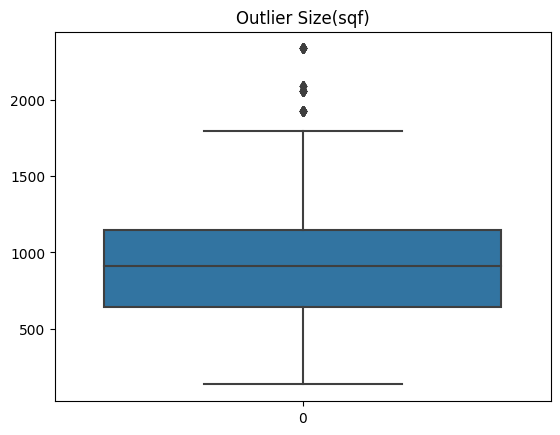

In [174]:
plt.title('Outlier Size(sqf)')
sns.boxplot(df['size(sqf)'])
plt.show()

In [175]:
# outlier pada facilities(etc)
Q1 = df['saleprice'].quantile(0.25)
Q3 = df['saleprice'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

IQR: 146398.0


In [176]:
# outlier Roomservice
upper = Q3 + (1.5 * IQR)
print(f'Upper outlier: {upper}')
lower = Q1 - (1.5 * IQR)
print(f'Lower outlier: {lower}')

df_upper = df[df['saleprice'] > upper]
upper_len = len(df_upper)

df_lower = df[df['saleprice'] < lower]
lower_len = len(df_lower)

print(f'jumlah upper outlier: {upper_len} \njumlah lower outlier: {lower_len}')

Upper outlier: 510747.0
Lower outlier: -74845.0
jumlah upper outlier: 27 
jumlah lower outlier: 0


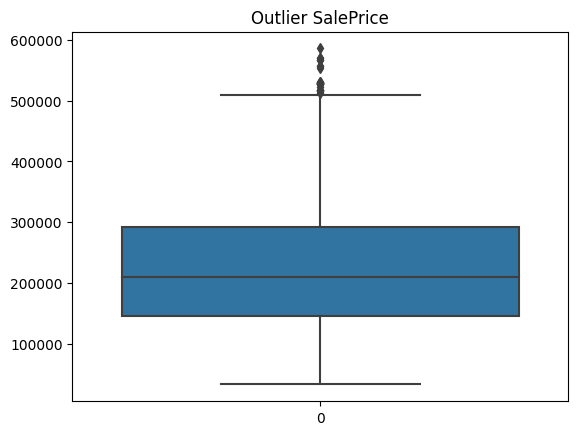

In [177]:
plt.title('Outlier SalePrice')
sns.boxplot(df['saleprice'])
plt.show()

Terdapat outlier sebesar 2.3% pada kolom size(sqf) dan 0.6% pada kolom salesprice. Outlier mungkin terjadi dikarenakan adanya apartemen yang memiliki fasilitas dan harga yang memang jauh lebih banyak dan mahal dibandingkan dengan unit aprtemen lainnya. Oleh karena itu, outlier disini tidak dihapus dan akan digunakan dalam pembuatan model. Nantinya fitur yang mempunyai outlier akan diproses dalam feature engineering dan digunakan robust scalling.

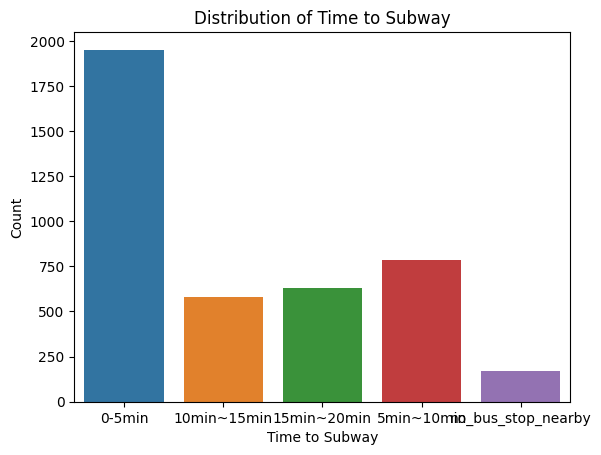

0-5min                1953
5min~10min             787
15min~20min            629
10min~15min            583
no_bus_stop_nearby     171
Name: timetosubway, dtype: int64

In [178]:
sns.countplot(x=df['timetosubway'])
plt.xlabel('Time to Subway')
plt.ylabel('Count')
plt.title('Distribution of Time to Subway')
plt.show()
df['timetosubway'].value_counts()

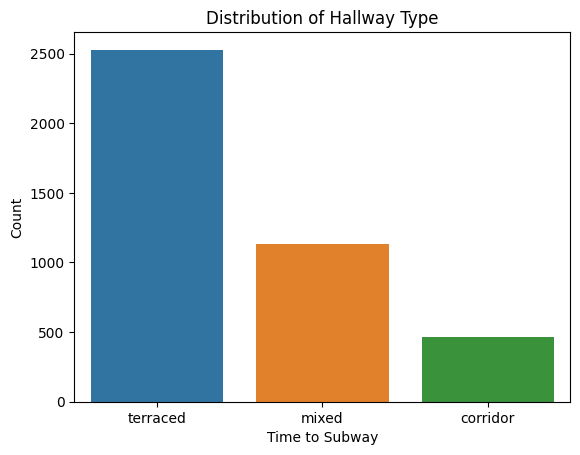

terraced    2528
mixed       1131
corridor     464
Name: hallwaytype, dtype: int64

In [179]:
sns.countplot(x=df['hallwaytype'])
plt.xlabel('Time to Subway')
plt.ylabel('Count')
plt.title('Distribution of Hallway Type')
plt.show()
df['hallwaytype'].value_counts()

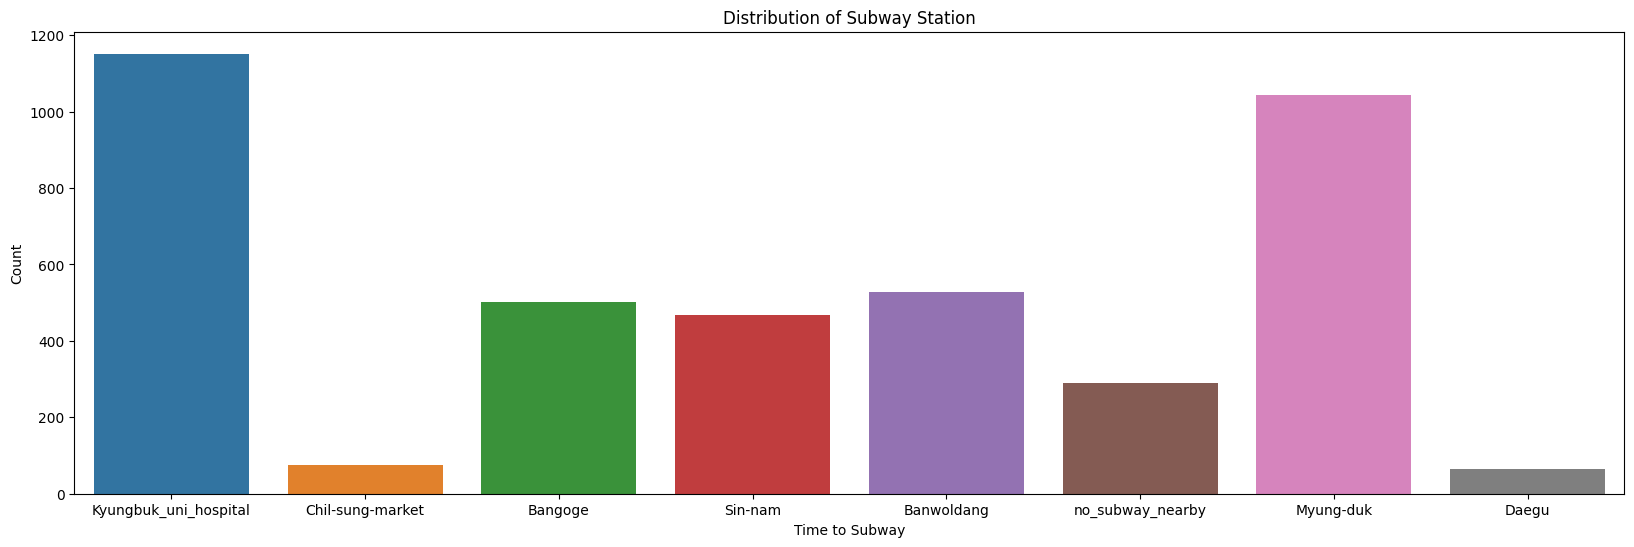

Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: subwaystation, dtype: int64

In [180]:
plt.figure(figsize=(20, 6))
sns.countplot(x=df['subwaystation'])
plt.xlabel('Time to Subway')
plt.ylabel('Count')
plt.title('Distribution of Subway Station')
plt.show()
df['subwaystation'].value_counts()

## Modeling

**Feature Engineering**

In [181]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold, cross_validate, cross_val_predict

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, RobustScaler, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.compose import TransformedTargetRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor



from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer, mean_absolute_percentage_error

Splitting data

In [182]:
# Split features and target
X = df.drop(columns=['saleprice']) # feature
y = df['saleprice'] # target

print(X.shape)
print(y.shape)

(4123, 10)
(4123,)


In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Encoding and scalling

In [184]:
ct = ColumnTransformer(transformers=[
    ("Encoding OneHot", OneHotEncoder(), ['hallwaytype', 'subwaystation']),
    ("Encoding Ordinal", OrdinalEncoder(), ['timetosubway']),
    ("Scalling MinMax", MinMaxScaler(), ['n_facilitiesnearby(etc)', 'n_facilitiesnearby(publicoffice)', 
                                'n_schoolnearby(university)', 'n_parkinglot(basement)', 
                                'n_facilitiesinapt']),
    ("Scalling Robust", RobustScaler(), ['size(sqf)'])
], remainder='passthrough', verbose_feature_names_out=False)

ct.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('Encoding OneHot', OneHotEncoder(),
                                 ['hallwaytype', 'subwaystation']),
                                ('Encoding Ordinal', OrdinalEncoder(),
                                 ['timetosubway']),
                                ('Scalling MinMax', MinMaxScaler(),
                                 ['n_facilitiesnearby(etc)',
                                  'n_facilitiesnearby(publicoffice)',
                                  'n_schoolnearby(university)',
                                  'n_parkinglot(basement)',
                                  'n_facilitiesinapt']),
                                ('Scalling Robust', RobustScaler(),
                                 ['size(sqf)'])],
                  verbose_feature_names_out=False)

In [185]:
X_train_pre = ct.transform(X_train)
X_test_pre = ct.transform(X_test)

In [186]:
ct.transformers_[0][1]

OneHotEncoder()

In [187]:
column_name = ct.get_feature_names_out()
X_train_pre = pd.DataFrame(X_train_pre, columns=column_name)
X_train_pre.head()

,hallwaytype_corridor,hallwaytype_mixed,hallwaytype_terraced,subwaystation_Bangoge,subwaystation_Banwoldang,subwaystation_Chil-sung-market,subwaystation_Daegu,subwaystation_Kyungbuk_uni_hospital,subwaystation_Myung-duk,subwaystation_Sin-nam,subwaystation_no_subway_nearby,timetosubway,n_facilitiesnearby(etc),n_facilitiesnearby(publicoffice),n_schoolnearby(university),n_parkinglot(basement),n_facilitiesinapt,size(sqf),yearbuilt
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.857143,1.0,0.405753,0.333333,2.765504,1993.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.571429,0.2,0.457986,0.444444,0.821705,2007.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.857143,1.0,0.405753,0.333333,0.007752,1993.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.142857,0.2,1.000000,1.000000,-0.515504,2015.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.428571,0.4,0.359576,0.777778,-0.156977,2008.0


## Pembuatan Model

Model yang akan dikomparasi adalah Linear Rgression, LGBM Regressor, Decision Tree Regressor, Random Forest Regressor, dan XGBoost Regressor. Sebelumnya sudah juga dicoba model seperti Ridge, Lasso, SVRegressor, dan juga KN Regressor. Akan tetapi, model tersebut mempunyai evaluasi metrics yang kurang dibandingkan model yang digunakan.

In [188]:
# Membuat list model dan nama model
models = [LinearRegression(), LGBMRegressor(), DecisionTreeRegressor(random_state=1), RandomForestRegressor(random_state=1), XGBRegressor(random_state=1)]
model_names = ['Linear Regression', 'LGBM Regressor', 'Decision Tree Regression', 'Random Forest Regressor', 'XGB Regressor']

# Membuat list untuk menyimpan hasil evaluasi metrics
r_squared = []
mae = []
rmse = []
mape = []

# Looping untuk setiap model
for model in models:
    # Melakukan cross validation dan menghitung metrics
    scores = cross_val_score(model, X_train_pre, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    r_squared_scores = cross_val_score(model, X_train_pre, y_train, cv=5, scoring='r2')
    mae_scores = cross_val_score(model, X_train_pre, y_train, cv=5, scoring='neg_mean_absolute_error')
    mape_scores = cross_val_score(model, X_train_pre, y_train, cv=5, scoring='neg_mean_absolute_percentage_error')
    
    # Menyimpan rata-rata metrics
    rmse_mean = rmse_scores.mean()
    r_squared_mean = r_squared_scores.mean()
    mae_mean = -mae_scores.mean()
    mape_mean = -mape_scores.mean()
    
    # Menambahkan metrics ke dalam list
    rmse.append(rmse_mean)
    r_squared.append(r_squared_mean)
    mae.append(mae_mean)
    mape.append(mape_mean)



In [189]:
# Membuat DataFrame untuk menampilkan metrics
metrics_df = pd.DataFrame({'Model': model_names,
                           'R-squared': r_squared,
                           'MAE': mae,
                           'RMSE': rmse,
                           'MAPE': mape})

metrics_df

,Model,R-squared,MAE,RMSE,MAPE
0,Linear Regression,0.762093,42345.662299,52346.678815,0.229440
1,LGBM Regressor,0.834621,34545.047516,43634.799257,0.184157
2,Decision Tree Regression,0.834971,34493.184692,43584.996638,0.183551
3,Random Forest Regressor,0.834162,34545.692170,43693.869932,0.184494
4,XGB Regressor,0.834739,34527.393836,43616.407727,0.183989


Pada evaluation metrics, disini metrics yang digunakan adalah R2, MAE, RMSE, MAPE. 
 - R2 atau R squared adalh metrik evaluasi yang mengukur sejauh mana varaibel target dapat dijelaskan oleh model regresi. Nilai R2 adalah antara 0 sampai 1 dimana semakin mendekati 1 semakin baik modelnya.

- MAE adalah Mean Absolute Error yang mengukur rata-rata kesalahan absolut dari nilai yang akan diprediksi dengan model dan nilai asli dalam dataset. Lebih kecil nilai MAEnya lebih bagus model yang dibuat.

- Kemudian metrics selanjutnya adalah RMSE. RMSE adalah Root Mean Squared Error yang menghitung akar kuadrat dari rata-rata kesalahan kuadrat dari nilai yang akan diprediksi oleh model dan nilai yang sebenarnya dalam dataset. Semakin kecil nilai RMSEnya maka model semakin bagus.

- Yang terakhir adalah MAPE. MAPE adalah Mean Absolute Percentage Error yang mengukur kesalah rata-rata dalam persentase antara nilai yang diprediksi oleh model dan nilai sebenarnya dalam data. Semakin kecil MAPEnya semakin bagus modelnya.

Dapat dilihat dari hasil pembuatan model diatas, dapat dilihat berdasarkan evaluation metricsnya pada data training yaitu model yang mempunyai evaluation yang bagus adalah Decision Tree dan XGBoost. Jika dilihat berdasarkan RMSEnya, model yang paling bagus adalah Random Forest kemudian diikuti oleh XGBoost. Kemudian jika dilihat berdasarkan R-squarednya, Kedua model tersebut mempunyai hasil yang bagus juga yaitu sebesar 0.834 pada kedua model.

Akan tetapi, jika dilihat berdasarkan RMSEnya, kedua model tersebut masih mempunyai nilai yang tinggi. Untuk RMSE seharusnya mempunyai nilai yang makin kecil semakin baik. Dibawah ini akan dilihat dari hasil evaluation metrics pada data testing.

**Melakukan perbandingan antara train dan test**

Dilakukan juga bagging pada model Decision tree untuk meningkatkan evaluation metrics pada model.

In [190]:
decision_tree = DecisionTreeRegressor(random_state=1)

# Membuat model dengan metode Bagging menggunakan Decision Tree sebagai estimator
bagging_model = BaggingRegressor(base_estimator=decision_tree, n_estimators=10, random_state=1)

In [191]:
models = [bagging_model, XGBRegressor(random_state=1)]
model_names = ['Decision Tree Regressor (bagging)', 'XGB Regressor']

r_squared = []
mae = []
rmse = []
mape = []

# Looping untuk setiap model
for model in models:
    # Melatih model pada data training
    model.fit(X_train_pre, y_train)
    
    # Memprediksi target pada data testing
    y_pred = model.predict(X_test_pre)
    
    # Menghitung metrics
    r_squared_score = r2_score(y_test, y_pred)
    mae_score = mean_absolute_error(y_test, y_pred)
    rmse_score = mean_squared_error(y_test, y_pred, squared=False)
    mape_score = mean_absolute_percentage_error(y_test, y_pred)
    
    # Menambahkan metrics ke dalam list
    r_squared.append(r_squared_score)
    mae.append(mae_score)
    rmse.append(rmse_score)
    mape.append(mape_score)


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


In [192]:
metrics_test = pd.DataFrame({'Model': model_names,
                           'R-squared': r_squared,
                           'MAE': mae,
                           'RMSE': rmse,
                           'MAPE': mape})

metrics_test

,Model,R-squared,MAE,RMSE,MAPE
0,Decision Tree Regressor (bagging),0.843024,32074.615053,41144.495812,0.177594
1,XGB Regressor,0.843058,32222.422240,41140.085458,0.178085


Berikut adalah hasil dari evaluation metrics pada data testing. Dapat dilihat bahwa ada peningkatan untuk kedua model saat testing. Jika dilihat berdasarkan evaluation metricsnya, kedua model memang tidak begitu berbeda jauh. Akan tetapi XGBoost Regressor memiliki nilai yang sedikit lebih baik dibandingkan model Decision Tree Regressor.

Berdasarkan evaluation metrics tersebut, maka model yang akan digunakan adalah XGBoost Regressor. Model tersebut akan dicoba untuk menggunakan hyperparameter tuning dengan tujuan agar model menjadi lebih baik dibandingkan model awal.

**XGBoost regressor dengan hyperparameter tuning**

In [193]:
# Membangun pipeline dengan transformer dan model Gradient Boosting
xgb_pipeline = Pipeline([
    ('transformer', ct),
    ('regressor', XGBRegressor(random_state=1))
])

In [194]:
xgb_pipeline

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Encoding OneHot',
                                                  OneHotEncoder(),
                                                  ['hallwaytype',
                                                   'subwaystation']),
                                                 ('Encoding Ordinal',
                                                  OrdinalEncoder(),
                                                  ['timetosubway']),
                                                 ('Scalling MinMax',
                                                  MinMaxScaler(),
                                                  ['n_facilitiesnearby(etc)',
                                                   'n_facilitiesnearby(publicoffice)',
                                                   'n_schoolnearby(university)',
                                                   'n_parkinglot(base...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=1, ...))])

In [195]:
# Learning rate
learning_rate = np.arange(0.01, 1.0, 0.001)

# Jumlah pohon
n_estimators = list(range(100, 301,1))

In [196]:
# Membuat parameter grid untuk hyperparameter tuning
# param_grid = {
#     'regressor__n_estimators': [100, 200, 300],
#     'regressor__learning_rate': [0.01, 0.1, 0.2],
#     'regressor__max_depth': [3, 5, 7]
# }

# # Membuat objek GridSearchCV untuk mencari kombinasi parameter terbaik
# grid_search = GridSearchCV(estimator=xgb_pipeline, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
# Mendefinisikan random search untuk hyperparameter tuning
param_grid = {
    'regressor__n_estimators': n_estimators,
    'regressor__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'regressor__learning_rate': learning_rate,
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0]
}

# Membangun objek RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_pipeline, param_distributions=param_grid, scoring='neg_mean_squared_error', cv=5)


# Melakukan hyperparameter tuning menggunakan data training
random_search.fit(X_train, y_train)

# Mendapatkan model terbaik setelah tuning
best_xgb_model = random_search.best_estimator_


Pada model XGBoost regressor ini, metode hyperparameter yang digunakan adalah Random Search. Random search menggunakan pendekatan acak dalam mencoba kombinasi nilai hyperparameternya. Random search juga untuk memilih kombinasi nilai hyperparameter secara acak. Kemudian, metode ini lebih efisien jika dibandingkan dengan gridsearch jika nilai hyperparameternya lebih besar atau lebih penting dibandingkan nilai hyperparameter yang lain.

Sebelumnya sudah dilakukan juga dengan metode gridsearch, tatpi hasil yang dilakukan tidak maksimal sehingga digunakan random search.

In [197]:
# Melakukan prediksi pada data training menggunakan model terbaik
y_pred_train = best_xgb_model.predict(X_train)

r_squared_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

In [198]:
# Menampilkan metrics
print("XGB Regression Metrics (Training):")
print("R-squared:", r_squared_train)
print("MAE:", mae_train)
print("RMSE:", rmse_train)
print("MAPE:", mape_train)

XGB Regression Metrics (Training):
R-squared: 0.8466281319030404
MAE: 33273.25489643344
RMSE: 42071.718190142295
MAPE: 0.1773867994401992


In [199]:
pd.DataFrame(random_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__subsample,param_regressor__n_estimators,param_regressor__max_depth,param_regressor__learning_rate,param_regressor__colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.134150,0.002749,0.008095,0.000797,0.8,156,6,0.137,0.6,"{'regressor__subsample': 0.8, 'regressor__n_es...",-1.895144e+09,-1.903022e+09,-1.811038e+09,-1.980096e+09,-1.915676e+09,-1.900995e+09,5.404274e+07,1
1,0.220551,0.005365,0.008313,0.000867,0.6,267,5,0.608,0.8,"{'regressor__subsample': 0.6, 'regressor__n_es...",-1.902727e+09,-1.934990e+09,-1.822044e+09,-2.034627e+09,-1.929202e+09,-1.924718e+09,6.816318e+07,4
2,0.252391,0.002817,0.008601,0.000490,0.8,175,9,0.796,1.0,"{'regressor__subsample': 0.8, 'regressor__n_es...",-1.893933e+09,-2.076741e+09,-1.820445e+09,-2.012965e+09,-1.929838e+09,-1.946784e+09,8.978954e+07,9
3,0.279159,0.011507,0.007916,0.000800,0.8,266,7,0.994,0.8,"{'regressor__subsample': 0.8, 'regressor__n_es...",-1.917854e+09,-1.927763e+09,-1.848862e+09,-2.013752e+09,-1.973591e+09,-1.936364e+09,5.558417e+07,8
4,0.229722,0.002319,0.008199,0.000400,0.6,169,9,0.841,0.8,"{'regressor__subsample': 0.6, 'regressor__n_es...",-2.026137e+09,-1.880227e+09,-1.866183e+09,-1.981116e+09,-2.008243e+09,-1.952381e+09,6.636652e+07,10


In [200]:
# Melakukan prediksi pada data testing menggunakan model terbaik
y_pred_xgb = best_xgb_model.predict(X_test)

# Menghitung metrics
r_squared_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

In [201]:
# Menampilkan metrics
print("XGB Regression Metrics (Testing):")
print("R-squared:", r_squared_xgb)
print("MAE:", mae_xgb)
print("RMSE:", rmse_xgb)
print("MAPE:", mape_xgb)

# Menampilkan kombinasi parameter terbaik
print("Best Parameters:", random_search.best_params_)

XGB Regression Metrics (Testing):
R-squared: 0.8434186580277516
MAE: 32187.13622159091
RMSE: 41092.785848128144
MAPE: 0.17825453022400256
Best Parameters: {'regressor__subsample': 0.8, 'regressor__n_estimators': 156, 'regressor__max_depth': 6, 'regressor__learning_rate': 0.1369999999999999, 'regressor__colsample_bytree': 0.6}


Berdasarkan dari hasil hyperparameter tuning dari model XGBoost diatas, dapat dilihat nilai R2 dari model tersebut meningkat menjadi 0.8434 dari yang sebelumnya 0.8430. Hal tersebut menandakan adanya peningkatan dari model XGBoost meskipun hanya sedikit meningkat. Jika dilihat dari RMSEnya juga ada penurunan dari sebelumnya yang bernilai 41140.085458 menjadi 41084.486327. Begitu pun dengan MAEnya, yaitu juga menurun. MAPEnya terdapat penurunan dari sebelum model di tuning.

Sebelum Tuning:
- R2: 0.843058, MAE: 32222.422240, RMSE: 41140.085458, MAPE: 0.178085

Sesudah Tuning:
- R2: 0.84341, MAE: 32187.13622, RMSE: 41092.78584, MAPE: 0.17825

## Feature Importance

In [202]:
xgb_estimator = best_xgb_model.named_steps['regressor']

In [203]:
importance_scores = xgb_estimator.feature_importances_

In [204]:
booster = xgb_estimator.get_booster()
importances_s =booster.get_score(importance_type='gain') 

In [205]:
transformed_features = ct.get_feature_names_out()
print(transformed_features)

['hallwaytype_corridor' 'hallwaytype_mixed' 'hallwaytype_terraced'
 'subwaystation_Bangoge' 'subwaystation_Banwoldang'
 'subwaystation_Chil-sung-market' 'subwaystation_Daegu'
 'subwaystation_Kyungbuk_uni_hospital' 'subwaystation_Myung-duk'
 'subwaystation_Sin-nam' 'subwaystation_no_subway_nearby' 'timetosubway'
 'n_facilitiesnearby(etc)' 'n_facilitiesnearby(publicoffice)'
 'n_schoolnearby(university)' 'n_parkinglot(basement)' 'n_facilitiesinapt'
 'size(sqf)' 'yearbuilt']


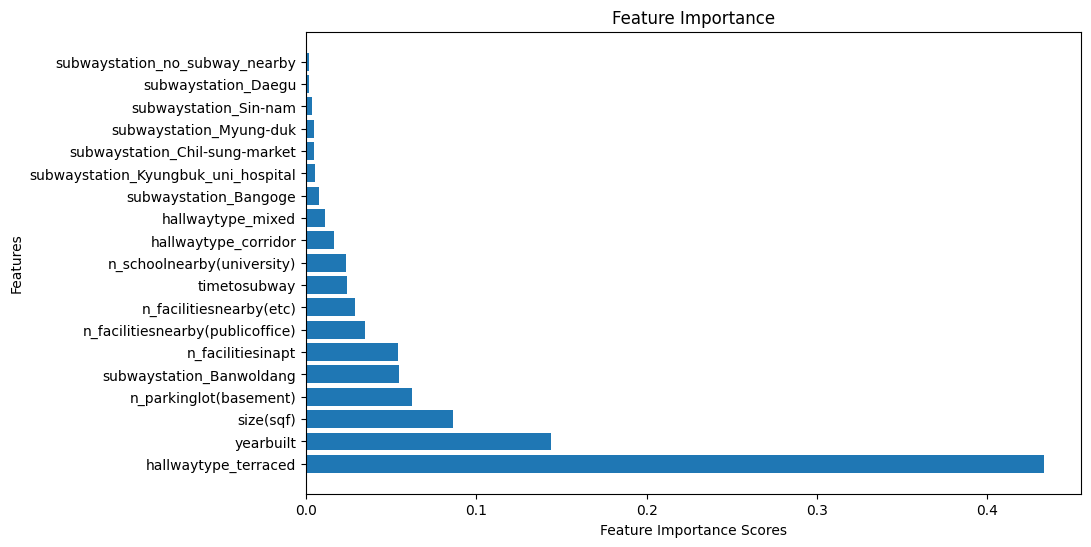

In [206]:
sorted_idx = np.argsort(importance_scores)[::-1]

# Menampilkan nama fitur yang diurutkan
sorted_features = np.array(transformed_features)[sorted_idx]

# Menampilkan skor kepentingan fitur dalam plot batang
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, importance_scores[sorted_idx])
plt.xlabel('Feature Importance Scores')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

## **Kesimpulan**

Berdasarkan model yang sudah dibuat dan dijalankan, terdapat beberapa fitur yang sangat berpengaruh terhadap variabel dependen atau variabel Sale Price. Secara berurutan (dari yang paling berpengaruh), fitur-fitur tersebut adalah:
- hallwaytype_terraced
- n_facilitiesinapt
- size(sqf)
- yearbuilt
- subwaystation_Banwoldang
- subwaystation_Bangoge
- n_parkinglot(basement)
- subwaystation_kyungbuk_uni_hospital
- n_schoolnearby(university)
- timetosubway

Berdasarkan fitur-fitur tersebut kita bisa melihat hallwaytype_terraced mungkin sangat diminati oleh pembeli dikarenakan adanya teras pada unit apartemen. Hal tersebut bisa membuat harga apartemen menjadi meningkat. Begitu pula dengan n_facilitiesinapt, yang membuktikan bahwa jumlah fasilitas di apartemen sangatlah menentukan harga dari unit apartemen tersebut. Kemudian fitur yang ketiga adalah size(sqf). Tentunya size memang akan sangat mempengaruhi nilai harga dari unit apartemen.

Berdasarkan dari evaluasi metricsnya, kakuratan dari model ini dapat dilihat dari R squarednya yang sebesar 0.843 menunjukkan bahwa model yang dibuat telah dapat memprediksi sebesar 84.43% persen dari data yang ada. Jika dilihat berdasarkan MAPE, maka model ini hanya mempunyai error sebesar 17% dalam memprediksi harga unit apartemen. 

Model ini masih dapat ditingkatkan lagi metrics-metricsnya dan juga dari segi datanya. Mungkin selanjutnya dalam pengambilan data untuk model, dapat mengumpulkan data yang lebih beragam lagi. Dikarenakan adanya banyak model, fasilitas, dan harga unit yang sama dalam satu apartemen, dikhawatirkan akan mempunyai bias yang tinggi pada saat memprediksi harga dari unit apartemen.

## **Rekomendasi**

Terdapat beberapa rekomendasi untuk model yang sudah dibuat yaitu:

1. Penambahan fitur seperti kota atau distrik tempat apartemen tersebut berada. Hal tersebut dapat meningkatkan hasil analisa dan juga dapat meningkatkan pembuatan model. Fitur jumlah kamar dan tipe unit apartemen juga bisa ditambahkan kedalam dataset dengan tujuan untuk menambahkan fitur dan memperkaya pembuatan model. 

2. Pengambilan data kedepannya harus lebih variatif lagi untuk jenis dan tipe unit dari apartemennya, agar dapat mengurangi bias dalam prediksi model.

3. Membuat dan membandingkan lebih dari satu modeli final. Membuat lebih dari satu model final dapat ningkatkan keragaman model. Diharapkan model yang banyak bisa menjadi perbandingan untuk prediksi harga apartemen yang akan datang.